In [1]:
from modules.read_text import read_text as rt

file = 'pictures/nemlig_cornflakes.jpeg'
brand, name = rt.get_txt(file)
print(name, brand)

cornflakes nemlig


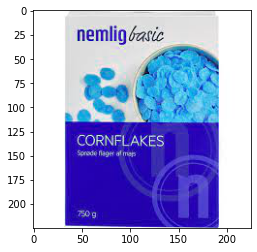

In [2]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(file)
plt.imshow(img)

In [3]:
from modules.scraping import main as scrape

cereals = scrape.get_cereal(name, brand)
for cereal in cereals:
    print(cereal)

Kellogg's Cornflakes. 500 grams. Costs: {'føtex': 65.9, 'nemlig': 65.9}. Nutrition(378.0, 7.0, 84.0, 3.0, 0.9, 1.13)
Urtekram  C-flakes u. tilsat sukker glutenfri øko. 375 grams. Costs: {'føtex': 71.87}. Nutrition(400.0, 8.4, 86.0, 4.0, 1.1, 1.3)
Nestlé  Chocolate cornflakes glutenfri. 375 grams. Costs: {'føtex': 48.0}. Nutrition(393.0, 6.1, 81.7, 4.0, 3.7, 1.33)
Rittersport  Hvid chokolade m. cornflakes og puffede ris. 100 grams. Costs: {'føtex': 149.5}. Nutrition(537.0, 5.2, 62.0, 0, 30.0, 0.48)
Irmas Økologiske Cornflakes. 500 grams. Costs: {'irma': 58.0}. Nutrition(371.0, 8.0, 80.0, 5.0, 1.0, 1.2)
Irmas Hverdag Økologiske branflakes. 375 grams. Costs: {'irma': 74.53}. Nutrition(355.0, 11.0, 65.0, 15.0, 2.3, 0.9)
Kellogg's Cornflakes. 500 grams. Costs: {'nemlig': 65.9, 'føtex': 65.9}. Nutrition(378.0, 7.0, 84.0, 3.0, 0.9, 1.13)
nemlig basic Cornflakes. 750 grams. Costs: {'nemlig': 21.91}. Nutrition(369.0, 7.2, 80.0, 1.6, 1.2, 1.3)
EASIS Cornflakes. 375 grams. Costs: {'nemlig': 74.53

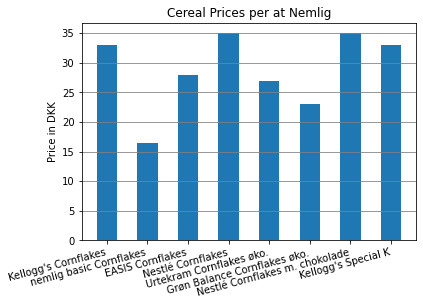

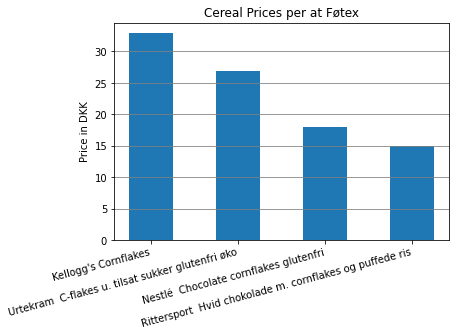

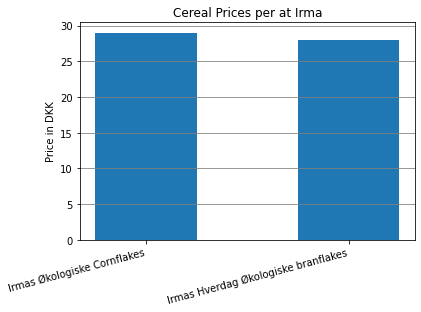

In [4]:
import modules.visualizing as vs
vs.show_prices(cereals)

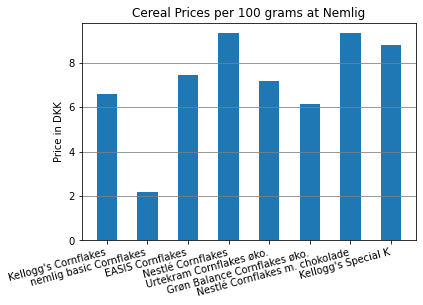

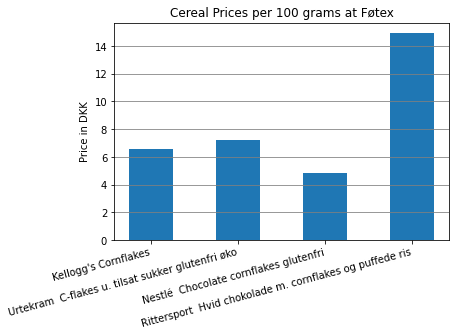

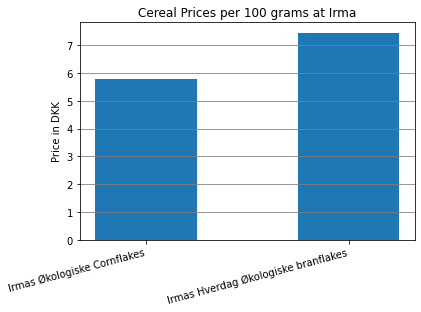

In [5]:
vs.show_prices(cereals, per_100g=True)

In [6]:
vs.show_nutrition(cereals)

Nutritional Content per 100 grams in Cereals


,Cereal Name,Calories,Protein,Carbohydrates,Fiber,Fat,Salt
0,Kellogg's Cornflakes,378.0 kcal,7.0 g,84.0 g,3.0 g,0.9 g,1.13 g
1,Urtekram C-flakes u. tilsat sukker glutenfri øko,400.0 kcal,8.4 g,86.0 g,4.0 g,1.1 g,1.3 g
2,Nestlé Chocolate cornflakes glutenfri,393.0 kcal,6.1 g,81.7 g,4.0 g,3.7 g,1.33 g
3,Rittersport Hvid chokolade m. cornflakes og p...,537.0 kcal,5.2 g,62.0 g,0 g,30.0 g,0.48 g
4,Irmas Økologiske Cornflakes,371.0 kcal,8.0 g,80.0 g,5.0 g,1.0 g,1.2 g
5,Irmas Hverdag Økologiske branflakes,355.0 kcal,11.0 g,65.0 g,15.0 g,2.3 g,0.9 g
6,Kellogg's Cornflakes,378.0 kcal,7.0 g,84.0 g,3.0 g,0.9 g,1.13 g
7,nemlig basic Cornflakes,369.0 kcal,7.2 g,80.0 g,1.6 g,1.2 g,1.3 g
8,EASIS Cornflakes,401.0 kcal,8.8 g,76.4 g,15.1 g,3.2 g,0.98 g
9,Nestlé Cornflakes,381.0 kcal,7.4 g,82.6 g,0 g,1.4 g,1.82 g


In [7]:
vs.show_recommended_nutrition()

Daily Recommended Maximum Nutritional Intake


,Sex,Calories,Protein,Carbohydrates,Fiber,Fat,Salt
0,Female,2000 kcal,45 g,325 g,25 g,77 g,6 g
1,Male,2500 kcal,55.5 g,325 g,38 g,77 g,6 g


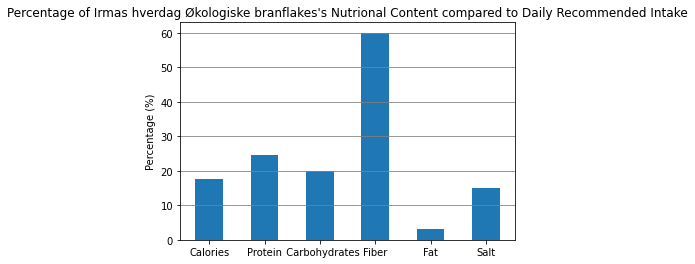

In [8]:
import random

idx = random.randint(0, len(cereals))
vs.show_pct_of_recommended_nutrition(cereals[idx], 'female')